In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np

In [2]:
#Read the Dataset
df_train = pd.read_csv('Dataset_train_padel_edited.csv', sep=',')
df_test = pd.read_csv('Dataset_test_padel_edited.csv', sep=',')

In [3]:
df_train

nAcid   ALogP     ALogp2       AMR        apol  naAromAtom  nAromBond  \
0         0  0.2233   0.049863   70.0534   76.025376          12         13   
1         1 -0.2439   0.059487   14.3849   35.047516          12         12   
2         0 -0.6813   0.464170   42.7040   62.218688          18         18   
3         2  0.2023   0.040925   44.9687   71.669860          23         24   
4         1  2.0771   4.314344  159.7139  117.142373           6          6   
...     ...     ...        ...       ...         ...         ...        ...   
2616      0 -0.4369   0.190882   49.6836   30.143102           0          0   
2617      1 -8.6979  75.653464  122.6846  113.445994           9         10   
2618      0 -0.0984   0.009683   59.6578   74.620274          21         22   
2619      2  0.8957   0.802278   31.3194   88.960204          33         35   
2620      0 -2.7500   7.562500   63.0885   47.009032           0          0   

      nAtom  nHeavyAtom  nH  ...     WTPT-1    WTPT-2     WTPT-3     WTPT-4  \
0        66          34  32  ...  71.201670  2.094167  18.726043  12.038283   
1        29          17  12  ...  34.154841  2.009108   7.396095   7.396095   
2        49          33  16  ...  67.163315  2.035252  33.832420  12.421201   
3        56          36  20  ...  72.666696  2.018519  36.153491  12.057732   
4       107          46  61  ...  93.603246  2.034853  12.958770   9.916845   
...     ...         ...  ..  ...        ...       ...        ...        ...   
2616     28          14  14  ...  28.014526  2.001038  10.593134  10.593134   
2617    106          48  58  ...  94.996453  1.979093  32.060122  14.860270   
2618     59          41  18  ...  83.091605  2.026625  44.040188  12.459157   
2619     71          43  28  ...  88.708828  2.062996  25.012148   7.035760   
2620     44          20  24  ...  41.754537  2.087727  14.973693   7.771793   

         WTPT-5    WPATH   WPOL   XLogP  Zagreb  active  
0      6.687760   3392.0   73.0   9.561   198.0     0.0  
1      0.000000    530.0   24.0   5.852    84.0     0.0  
2     15.403882   3502.0   53.0   5.992   176.0     1.0  
3      9.505728   4274.0   60.0   5.230   194.0     1.0  
4      3.041925   7511.0  100.0  13.527   270.0     1.0  
...         ...      ...    ...     ...     ...     ...  
2616   0.000000    266.0   23.0  -1.060    74.0     1.0  
2617  17.199852  10085.0   65.0   6.591   222.0     0.0  
2618  12.378858   5790.0   69.0   5.298   230.0     1.0  
2619   9.898856   6245.0   77.0  13.130   238.0     1.0  
2620   7.201901    653.0   42.0  -0.210   120.0     0.0  

[2621 rows x 1444 columns]

In [4]:
df_test

nAcid   ALogP     ALogp2       AMR        apol  naAromAtom  nAromBond  \
0         0 -0.8246   0.679965   30.8082   58.953446          19         22   
1         0 -0.1388   0.019265   26.5318   60.611446          21         24   
2         2 -0.9673   0.935669  191.7513  127.715131           0          0   
3         0 -0.5162   0.266462   86.4240  114.598134          30         30   
4         0  1.7350   3.010225   81.9806   69.672962           9         10   
...     ...     ...        ...       ...         ...         ...        ...   
1119      2 -1.4182   2.011291   44.6940   58.103067          15         17   
1120      1 -1.0189   1.038157   31.1932   64.971032          21         24   
1121      0 -8.5929  73.837930  140.1859  115.544338           0          0   
1122      2 -0.9440   0.891136   24.1688   55.960688          20         22   
1123      1 -1.8817   3.540795   44.2704   97.959790          33         36   

      nAtom  nHeavyAtom  nH  ...      WTPT-1    WTPT-2     WTPT-3     WTPT-4  \
0        49          27  22  ...   56.905772  2.107621  12.852939   6.286213   
1        48          26  22  ...   53.950565  2.075022   5.706052   2.524466   
2       120          53  67  ...  107.184976  2.022358  29.004188  25.990040   
3        93          55  38  ...  111.591161  2.028930  39.705534  27.344229   
4        62          28  34  ...   58.031889  2.072567   9.271157   2.567150   
...     ...         ...  ..  ...         ...       ...        ...        ...   
1119     49          30  19  ...   61.278840  2.042628  21.524865  18.382871   
1120     54          30  24  ...   61.824667  2.060822  10.982047  10.982047   
1121    111          45  66  ...   90.004484  2.000100  21.859161  21.859161   
1122     45          29  16  ...   59.398386  2.048220  14.893385  14.893385   
1123     78          48  30  ...   99.401068  2.070856  24.747926  21.248230   

        WTPT-5    WPATH   WPOL   XLogP  Zagreb  active  
0     6.566726   2162.0   40.0   5.853   148.0     1.0  
1     0.000000   1746.0   41.0   9.201   138.0     1.0  
2     3.014148  11700.0  116.0   8.505   304.0     1.0  
3     3.088891  16116.0   80.0   8.885   280.0     1.0  
4     6.704006   1770.0   56.0   7.591   166.0     1.0  
...        ...      ...    ...     ...     ...     ...  
1119  3.141994   2683.0   48.0   3.565   160.0     1.0  
1120  0.000000   2801.0   46.0   8.771   156.0     1.0  
1121  0.000000  11495.0   56.0   7.914   214.0     0.0  
1122  0.000000   2008.0   54.0   7.252   158.0     0.0  
1123  0.000000   9517.0   84.0  12.239   266.0     1.0  

[1124 rows x 1444 columns]

In [5]:
X_train = df_train.loc[:, ~df_train.columns.isin(['active'])]
X_test = df_test.loc[:, ~df_test.columns.isin(['active'])]

In [6]:
y_train = df_train['active']
y_test = df_test['active']

In [7]:
#XGBoost
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="macro")
recall = recall_score(y_test,y_pred, average="macro")
print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
activity = ['non-active', 'active']
print(classification_report(y_test, y_pred, target_names=activity))

C:\Users\garud\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.943950177935943 ;
Precision: 0.9445529777994133 ;
Recall: 0.9425813445565705 ;

              precision    recall  f1-score   support

  non-active       0.95      0.93      0.94       515
      active       0.94      0.96      0.95       609

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124



In [8]:
#Using Feature Importance
clf.feature_importances_

array([6.9849560e-04, 4.7770417e-03, 1.8085731e-04, ..., 0.0000000e+00,
       2.4692339e-05, 0.0000000e+00], dtype=float32)

In [9]:
#Sorting
feature_importances = pd.DataFrame(clf.feature_importances_, index = df_train.columns[:-1], columns=['importance']).sort_values('importance', ascending=False)

In [10]:
#Sorted from the most important to less important features
feature_importances

importance
AATS3v    0.141946
SP-6      0.070630
GATS1i    0.041218
SsssN     0.037752
MWC7      0.025637
...            ...
nsSH      0.000000
ndS       0.000000
nssS      0.000000
naaS      0.000000
Zagreb    0.000000

[1443 rows x 1 columns]

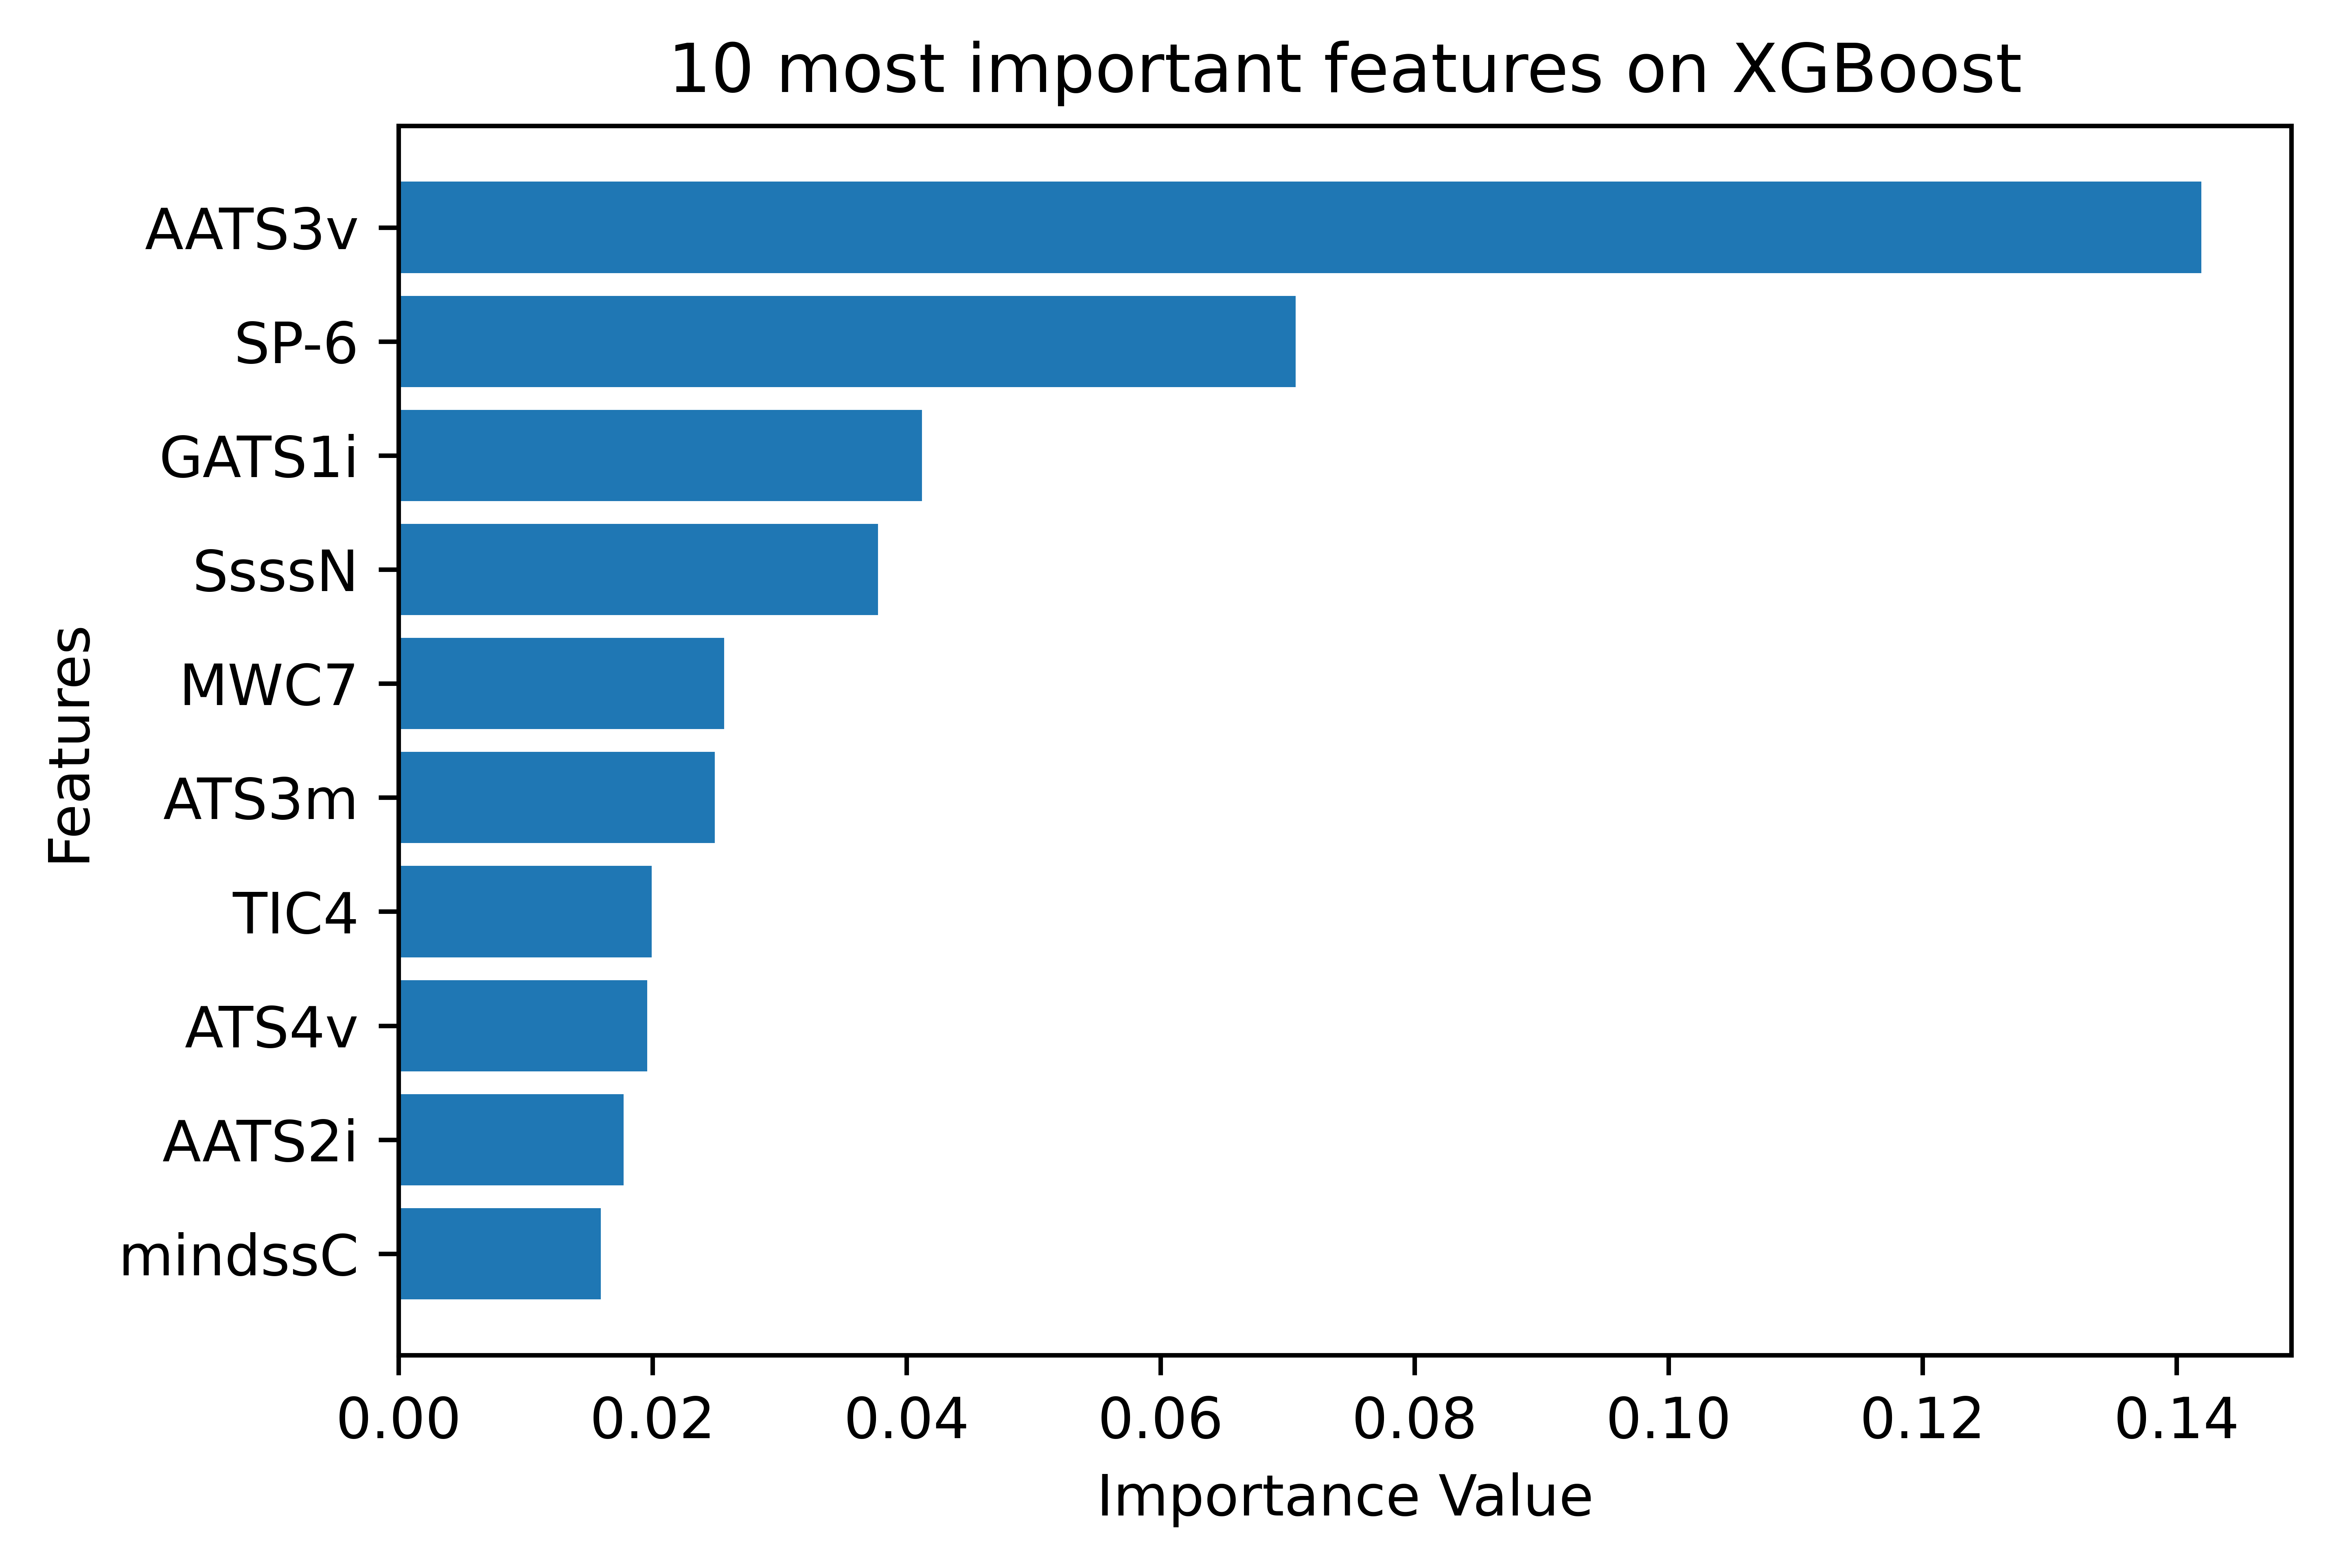

In [11]:
#Visualization
importance = clf.feature_importances_
top10 = feature_importances[:10]
Top10 = top10.index

sort = np.sort(clf.feature_importances_)
importance_values = sort[::-1]
top10values = importance_values[:10]

plt.barh(Top10, top10values)
plt.gca().invert_yaxis()
plt.title('10 most important features on XGBoost')
plt.ylabel('Features')
plt.xlabel('Importance Value')
plt.gcf().set_dpi(1000)
plt.show()

In [12]:
df_t = feature_importances.T
df_t 

AATS3v     SP-6    GATS1i     SsssN      MWC7     ATS3m  \
importance  0.141946  0.07063  0.041218  0.037752  0.025637  0.024884   

                TIC4     ATS4v    AATS2i   mindssC  ...  nssPH  nsssP  ndsssP  \
importance  0.019913  0.019559  0.017711  0.015905  ...    0.0    0.0     0.0   

            nddsP  nsssssP  nsSH  ndS  nssS  naaS  Zagreb  
importance    0.0      0.0   0.0  0.0   0.0   0.0     0.0  

[1 rows x 1443 columns]

In [13]:
#Delete 0 importance
for column in df_train:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_train = df_train.drop(column , 1)

for column in df_test:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_test = df_test.drop(column , 1)

for column in df_t :
  if float(df_t[column] == 0.0):
    df_t = df_t.drop(column , 1)

C:\Users\garud\AppData\Local\Temp/ipykernel_19440/2004814466.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_19440/2004814466.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_19440/2004814466.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_t = df_t.drop(column , 1)


In [14]:
len(df_t.columns)

612

In [15]:
len(df_train.columns)

613

In [16]:
len(df_test.columns)

613

In [17]:
#Sort df_train and df_test based on Feature Importance
df_train_final = pd.concat([df_t, df_train], axis=0)
df_test_final = pd.concat([df_t, df_test], axis=0)

In [18]:
df_train_final

AATS3v      SP-6    GATS1i     SsssN      MWC7         ATS3m  \
importance    0.141946  0.070630  0.041218  0.037752  0.025637      0.024884   
0           194.196615  8.936835  1.147537  1.545043  9.984560  13201.915753   
1           210.055769  1.853634  0.838209  0.000000  8.649098   4243.080952   
2           226.481634  5.335957  1.047472  0.000000  9.560081  10821.117160   
3           224.331846  5.012236  0.990373  1.376713  9.676524  13239.949150   
...                ...       ...       ...       ...       ...           ...   
2616        180.819786  1.988075  1.232503  0.000000  8.834483   4374.627939   
2617        145.925205  5.766139  1.415293  0.000000  9.532641  12398.235697   
2618        227.507186  6.961933  0.985307  0.000000  9.926374  15072.325921   
2619        220.528024  7.763240  0.836842  0.000000  9.998298  14397.434340   
2620        162.466227  5.051896  1.571731  1.922269  9.540148   7969.594214   

                  TIC4         ATS4v      AATS2i   mindssC  ...  \
importance    0.019913      0.019559    0.017711  0.015905  ...   
0           357.910462  38750.921377  150.632974 -0.008487  ...   
1           128.126561  11492.726235  143.862363 -1.113508  ...   
2           261.120782  22550.200498  150.002141 -0.536846  ...   
3           281.211876  28672.639850  151.497858  0.000000  ...   
...                ...           ...         ...       ...  ...   
2616        123.851050  12012.458871  152.933841 -0.393519  ...   
2617        581.410962  42318.643755  155.370302 -1.148248  ...   
2618        330.321052  32225.512705  154.860537 -0.812775  ...   
2619        383.877158  40863.070560  147.615539  0.000000  ...   
2620        216.214991  25832.966878  155.718867  0.188214  ...   

            ETA_Epsilon_3    GATS4v       MIC3      GGI6    GATS8e  \
importance        0.00001  0.000009   0.000007  0.000006  0.000005   
0                 0.44783  1.044815  39.536405  1.068753  0.836089   
1                 0.43878  1.053000  36.039013  0.263673  1.575475   
2                 0.44194  1.042583  53.196011  0.895692  0.849128   
3                 0.44118  0.965920  51.279692  0.877506  0.506280   
...                   ...       ...        ...       ...       ...   
2616              0.44000  1.170042  33.623075  0.000000  0.000000   
2617              0.43521  0.962276  36.296348  1.213968  1.237933   
2618              0.44261  1.052355  59.546544  1.308844  0.907064   
2619              0.44454  0.997558  45.573602  1.078639  0.519648   
2620              0.44815  1.006654  33.577212  0.304490  1.000535   

                   ATS2v     AVP-7     ATSC7s         ATS0i  active  
importance      0.000005  0.000005   0.000004      0.000003     NaN  
0           30072.091314  0.009140 -22.490192  10631.892104     0.0  
1           12029.419223  0.008282   2.622209   4550.486667     0.0  
2           23045.354702  0.005988  17.453309   7880.309888     1.0  
3           26091.411552  0.008929 -38.885404   9107.338049     1.0  
...                  ...       ...        ...           ...     ...  
2616        11391.560879  0.009638 -15.918367   4598.595832     1.0  
2617        36156.896289  0.013175 -19.905631  17669.968728     0.0  
2618        29851.651127  0.006515 -22.618157   9867.628201     1.0  
2619        33517.989201  0.007422  -9.207662  11395.854996     1.0  
2620        19636.007164  0.019236  20.609031   7318.772973     0.0  

[2622 rows x 613 columns]

In [19]:
df_test_final

AATS3v       SP-6    GATS1i     SsssN       MWC7  \
importance    0.141946   0.070630  0.041218  0.037752   0.025637   
0           187.647405   5.155999  1.223299  2.455370   9.394577   
1           211.882900   4.919038  0.822384  0.000000   9.359191   
2           182.546287  12.261196  1.323381  0.000000  10.475230   
3           210.007436   7.763778  1.205445  0.000000   9.828710   
...                ...        ...       ...       ...        ...   
1119        198.215997   4.921177  0.990983  0.000000   9.509630   
1120        203.292877   5.434141  1.001141  0.000000   9.438670   
1121        130.179095   5.260099  1.441462  0.000000   9.480749   
1122        251.026749   5.885482  0.734443  0.000000   9.600827   
1123        221.892165   9.278609  0.937984  0.000000  10.083598   

                   ATS3m        TIC4         ATS4v      AATS2i   mindssC  ...  \
importance      0.024884    0.019913      0.019559    0.017711  0.015905  ...   
0            7014.403540  241.120782  20175.451456  151.418276  0.000000  ...   
1            7681.329669  237.323313  23524.371559  143.241045  0.000000  ...   
2           21454.480152  747.542659  80607.925289  152.132289 -1.416990  ...   
3           15827.623410  504.631994  40911.417674  149.727342 -0.347288  ...   
...                  ...         ...           ...         ...       ...  ...   
1119         8801.366508  239.120782  23223.727655  147.508753 -1.589763  ...   
1120         7898.596934  275.254150  25348.085210  146.867529 -0.986350  ...   
1121        11356.825312  580.166893  41450.707424  154.125086 -0.147872  ...   
1122         9103.508486  199.133389  26476.293621  141.597228 -1.275121  ...   
1123        15467.334244  443.506486  43250.663855  143.613414 -1.355078  ...   

            ETA_Epsilon_3    GATS4v       MIC3      GGI6    GATS8e  \
importance        0.00001  0.000009   0.000007  0.000006  0.000005   
0                 0.44795  0.948119  37.802967  0.324082  0.756404   
1                 0.44444  1.020658  37.448293  0.557596  0.817037   
2                 0.44228  1.131289  41.368964  2.539592  0.763364   
3                 0.44013  1.090115  47.200700  0.973878  0.504139   
...                   ...       ...        ...       ...       ...   
1119              0.44286  0.843919  42.548362  0.650748  1.018478   
1120              0.44286  1.011186  38.192451  0.638413  0.487469   
1121              0.43740  1.003485  31.524382  0.682540  1.165780   
1122              0.44321  1.123741  37.760038  0.862041  0.984377   
1123              0.44545  0.912416  48.374314  1.467664  0.697575   

                   ATS2v     AVP-7     ATSC7s         ATS0i  active  
importance      0.000005  0.000005   0.000004      0.000003     NaN  
0           21680.249251  0.006150  -3.111678   7777.841232     1.0  
1           21791.951789  0.012113  -0.288386   7404.033984     1.0  
2           50995.349717  0.014352 -44.108987  19780.598562     1.0  
3           38782.955341  0.006916 -28.738717  14674.011340     1.0  
...                  ...       ...        ...           ...     ...  
1119        22152.954203  0.006270 -18.942651   7812.310286     1.0  
1120        22964.599217  0.007575  -6.609053   8476.482050     1.0  
1121        38425.558448  0.022926 -17.637214  18379.566495     0.0  
1122        21768.451938  0.006345 -55.667654   6987.660337     0.0  
1123        37948.977635  0.006574  65.221816  12083.449542     1.0  

[1125 rows x 613 columns]

In [20]:
#Remove the [importance] row
df_train = df_train_final.iloc[1:]
df_test = df_test_final.iloc[1:]

In [21]:
df_train

AATS3v       SP-6    GATS1i     SsssN       MWC7         ATS3m  \
0     194.196615   8.936835  1.147537  1.545043   9.984560  13201.915753   
1     210.055769   1.853634  0.838209  0.000000   8.649098   4243.080952   
2     226.481634   5.335957  1.047472  0.000000   9.560081  10821.117160   
3     224.331846   5.012236  0.990373  1.376713   9.676524  13239.949150   
4     190.658122  10.379373  1.214179  0.000000  10.356695  17680.864684   
...          ...        ...       ...       ...        ...           ...   
2616  180.819786   1.988075  1.232503  0.000000   8.834483   4374.627939   
2617  145.925205   5.766139  1.415293  0.000000   9.532641  12398.235697   
2618  227.507186   6.961933  0.985307  0.000000   9.926374  15072.325921   
2619  220.528024   7.763240  0.836842  0.000000   9.998298  14397.434340   
2620  162.466227   5.051896  1.571731  1.922269   9.540148   7969.594214   

            TIC4         ATS4v      AATS2i   mindssC  ...  ETA_Epsilon_3  \
0     357.910462  38750.921377  150.632974 -0.008487  ...        0.44783   
1     128.126561  11492.726235  143.862363 -1.113508  ...        0.43878   
2     261.120782  22550.200498  150.002141 -0.536846  ...        0.44194   
3     281.211876  28672.639850  151.497858  0.000000  ...        0.44118   
4     635.297868  74503.995565  150.329613 -0.971821  ...        0.44375   
...          ...           ...         ...       ...  ...            ...   
2616  123.851050  12012.458871  152.933841 -0.393519  ...        0.44000   
2617  581.410962  42318.643755  155.370302 -1.148248  ...        0.43521   
2618  330.321052  32225.512705  154.860537 -0.812775  ...        0.44261   
2619  383.877158  40863.070560  147.615539  0.000000  ...        0.44454   
2620  216.214991  25832.966878  155.718867  0.188214  ...        0.44815   

        GATS4v       MIC3      GGI6    GATS8e         ATS2v     AVP-7  \
0     1.044815  39.536405  1.068753  0.836089  30072.091314  0.009140   
1     1.053000  36.039013  0.263673  1.575475  12029.419223  0.008282   
2     1.042583  53.196011  0.895692  0.849128  23045.354702  0.005988   
3     0.965920  51.279692  0.877506  0.506280  26091.411552  0.008929   
4     1.134014  37.346594  2.333878  1.350362  46909.697719  0.015518   
...        ...        ...       ...       ...           ...       ...   
2616  1.170042  33.623075  0.000000  0.000000  11391.560879  0.009638   
2617  0.962276  36.296348  1.213968  1.237933  36156.896289  0.013175   
2618  1.052355  59.546544  1.308844  0.907064  29851.651127  0.006515   
2619  0.997558  45.573602  1.078639  0.519648  33517.989201  0.007422   
2620  1.006654  33.577212  0.304490  1.000535  19636.007164  0.019236   

         ATSC7s         ATS0i  active  
0    -22.490192  10631.892104     0.0  
1      2.622209   4550.486667     0.0  
2     17.453309   7880.309888     1.0  
3    -38.885404   9107.338049     1.0  
4     21.751677  17431.590579     1.0  
...         ...           ...     ...  
2616 -15.918367   4598.595832     1.0  
2617 -19.905631  17669.968728     0.0  
2618 -22.618157   9867.628201     1.0  
2619  -9.207662  11395.854996     1.0  
2620  20.609031   7318.772973     0.0  

[2621 rows x 613 columns]

In [22]:
df_test

AATS3v       SP-6    GATS1i    SsssN       MWC7         ATS3m  \
0     187.647405   5.155999  1.223299  2.45537   9.394577   7014.403540   
1     211.882900   4.919038  0.822384  0.00000   9.359191   7681.329669   
2     182.546287  12.261196  1.323381  0.00000  10.475230  21454.480152   
3     210.007436   7.763778  1.205445  0.00000   9.828710  15827.623410   
4     190.311831   6.469109  1.275070  0.00000   9.829033   9649.070540   
...          ...        ...       ...      ...        ...           ...   
1119  198.215997   4.921177  0.990983  0.00000   9.509630   8801.366508   
1120  203.292877   5.434141  1.001141  0.00000   9.438670   7898.596934   
1121  130.179095   5.260099  1.441462  0.00000   9.480749  11356.825312   
1122  251.026749   5.885482  0.734443  0.00000   9.600827   9103.508486   
1123  221.892165   9.278609  0.937984  0.00000  10.083598  15467.334244   

            TIC4         ATS4v      AATS2i   mindssC  ...  ETA_Epsilon_3  \
0     241.120782  20175.451456  151.418276  0.000000  ...        0.44795   
1     237.323313  23524.371559  143.241045  0.000000  ...        0.44444   
2     747.542659  80607.925289  152.132289 -1.416990  ...        0.44228   
3     504.631994  40911.417674  149.727342 -0.347288  ...        0.44013   
4     334.140621  38096.282993  151.386555  1.604792  ...        0.44737   
...          ...           ...         ...       ...  ...            ...   
1119  239.120782  23223.727655  147.508753 -1.589763  ...        0.44286   
1120  275.254150  25348.085210  146.867529 -0.986350  ...        0.44286   
1121  580.166893  41450.707424  154.125086 -0.147872  ...        0.43740   
1122  199.133389  26476.293621  141.597228 -1.275121  ...        0.44321   
1123  443.506486  43250.663855  143.613414 -1.355078  ...        0.44545   

        GATS4v       MIC3      GGI6    GATS8e         ATS2v     AVP-7  \
0     0.948119  37.802967  0.324082  0.756404  21680.249251  0.006150   
1     1.020658  37.448293  0.557596  0.817037  21791.951789  0.012113   
2     1.131289  41.368964  2.539592  0.763364  50995.349717  0.014352   
3     1.090115  47.200700  0.973878  0.504139  38782.955341  0.006916   
4     1.171906  35.757792  0.939592  1.954185  27566.159956  0.012069   
...        ...        ...       ...       ...           ...       ...   
1119  0.843919  42.548362  0.650748  1.018478  22152.954203  0.006270   
1120  1.011186  38.192451  0.638413  0.487469  22964.599217  0.007575   
1121  1.003485  31.524382  0.682540  1.165780  38425.558448  0.022926   
1122  1.123741  37.760038  0.862041  0.984377  21768.451938  0.006345   
1123  0.912416  48.374314  1.467664  0.697575  37948.977635  0.006574   

         ATSC7s         ATS0i  active  
0     -3.111678   7777.841232     1.0  
1     -0.288386   7404.033984     1.0  
2    -44.108987  19780.598562     1.0  
3    -28.738717  14674.011340     1.0  
4    -13.252645  10064.990482     1.0  
...         ...           ...     ...  
1119 -18.942651   7812.310286     1.0  
1120  -6.609053   8476.482050     1.0  
1121 -17.637214  18379.566495     0.0  
1122 -55.667654   6987.660337     0.0  
1123  65.221816  12083.449542     1.0  

[1124 rows x 613 columns]

In [23]:
#Adaptive Boosting with every 10% of features
x = 10
best_accuracy = 0

feature_percentage = []
arr_accuracy = []

while x<=100:
    #Create array feature percentage for plotting
    feature_percentage.append(x)
    
    tenPercent = len(df_t.columns) * (x/100)
    feature = feature_importances[:round(tenPercent)] #Take specific amount of features

    feature_name = feature.index

    #Create new df_train
    new_df_train = df_train.loc[:,feature_name]
    new_df_train['active'] = df_train['active']

    #Create new df_test
    new_df_test = df_test.loc[:,feature_name]
    new_df_test['active'] = df_test['active']

    new_X_train = new_df_train.loc[:, ~new_df_train.columns.isin(['active'])]
    new_X_test = new_df_test.loc[:, ~new_df_test.columns.isin(['active'])]

    new_y_train = new_df_train['active']
    new_y_test = new_df_test['active']

    clf1 = XGBClassifier(use_label_encoder=False, verbosity = 0)
    #clf1.fit(new_X_train, new_y_train)
    #y_pred = clf1.predict(new_X_test)
    
    print(x,"% of the dataset")
    print(len(new_df_train.columns),"features used\n")
    
    # prepare the cross-validation procedure
    score = cross_val_score(clf1, new_X_train, new_y_train, scoring='accuracy', cv = 10)
    accuracy = np.average(score)
    
    print("Accuracy: ", accuracy,"\n")
    
    #accuracy = accuracy_score(new_y_test,y_pred)
    #precision = precision_score(new_y_test,y_pred, average="macro")
    #recall = recall_score(new_y_test,y_pred, average="macro")
    
    #Create array accuracy for plotting
    arr_accuracy.append(accuracy)
    
    #print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
    #activity = ['non-active', 'active']
    #print(classification_report(new_y_test, y_pred, target_names=activity))
    print("======================================================\n")
    
    if best_accuracy < accuracy:
        best_new_X_train = new_X_train
        best_new_X_test = new_X_test
        best_new_y_train = new_y_train
        best_new_y_test = new_y_test
        
        bestPercentage = x
        bestSumOfDataset = len(new_df_train.columns)
        
        best_accuracy = accuracy
        #best_precision = precision
        #best_recall = recall
        
        #class_report = classification_report(new_y_test, y_pred, target_names=activity)
        
    x += 10

print("BEST OUTPUT")
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")
print("Accuracy: ", accuracy)
#print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(best_accuracy,best_precision,best_recall))
#print(class_report)

10 % of the dataset
62 features used

Accuracy:  0.9401039096740487 


20 % of the dataset
123 features used

Accuracy:  0.9435317679157113 


30 % of the dataset
185 features used

Accuracy:  0.939719327779874 


40 % of the dataset
246 features used

Accuracy:  0.9450541317156705 


50 % of the dataset
307 features used

Accuracy:  0.9458174904942964 


60 % of the dataset
368 features used

Accuracy:  0.9439119960525935 


70 % of the dataset
429 features used

Accuracy:  0.9439105448001625 


80 % of the dataset
491 features used

Accuracy:  0.9439134473050241 


90 % of the dataset
552 features used

Accuracy:  0.9473427567991177 


100 % of the dataset
613 features used

Accuracy:  0.9458203929991583 


BEST OUTPUT
90 % of the dataset
552 features used

Accuracy:  0.9458203929991583


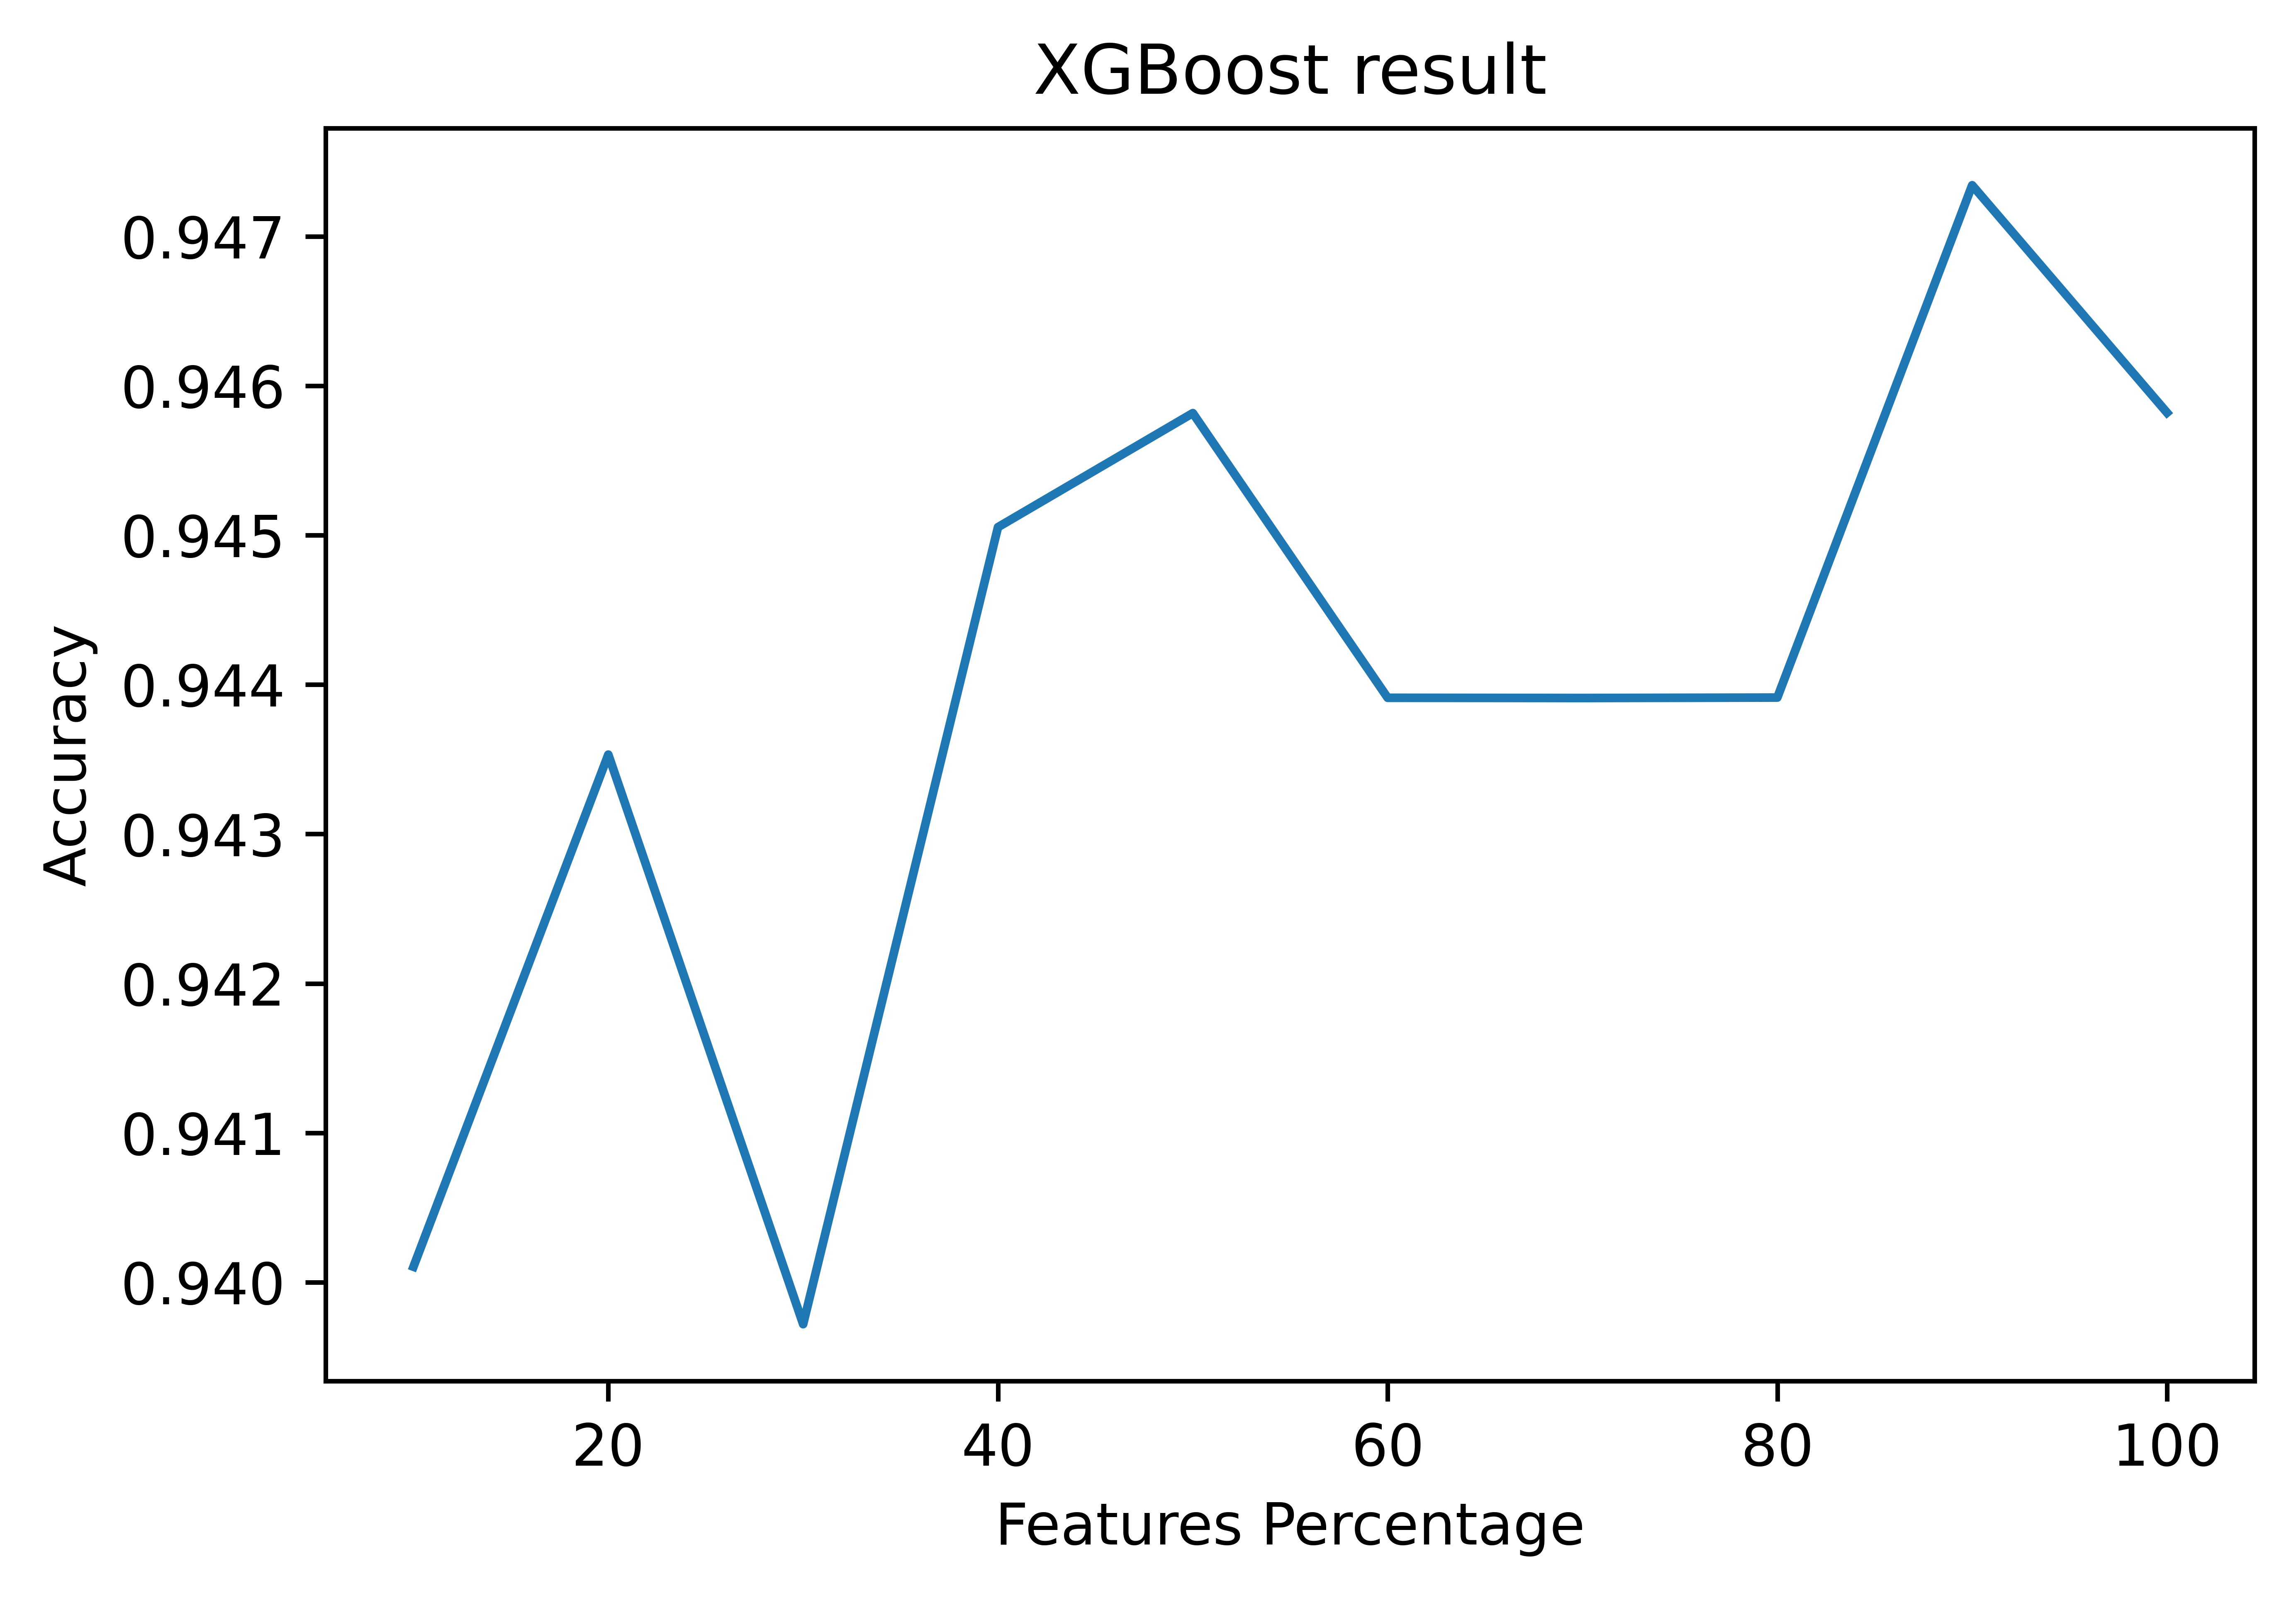

In [24]:
plt.figure()
plt.title('XGBoost result')
plt.plot(feature_percentage, arr_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Features Percentage')
plt.gcf().set_dpi(1000)
plt.show()

# Grid Search CV

In [31]:
#Make a timer (optional)
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
   
# Fit the grid search to the data
from sklearn.model_selection import GridSearchCV

param_grid = {
             'min_child_weight' : [1, 5, 10],
             'gamma' : [0, 0.5, 1, 1.5, 2, 5],
             'subsample' : [0.6, 0.8, 1.0],
             'colsample_bytree' : [0, 0.6, 0.8, 1.0],
             'max_depth' : [5, 6, 7, 8, 9, 10],
             'tree_method' : ['auto', 'exact', 'approx'],
             }

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, verbosity = 0), param_grid, cv = 10, verbose = 3, scoring = 'accuracy')

start_time = timer(None)
grid.fit(best_new_X_train, best_new_y_train)
timer(start_time)

Fitting 10 folds for each of 3888 candidates, totalling 38880 fits
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0

[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.913 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] 

[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/

[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s


[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time

[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s

[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s

[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s

[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=  

[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0

[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.870 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1

[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 9/

[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/

[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.885 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.2s
[

[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.859 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.890 total time=   0.3s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 3/10] 

[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.878 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 1/10] EN

[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.859 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.889 total time=   0.2s
[CV 9/10] END

[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.875 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.2s
[CV 

[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.3s

[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.909 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[C

[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1

[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s

[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=

[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=  

[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.844 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.3s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.3s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.3s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.534 total time=   0

[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2

[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.859 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.878 total time=   0.2s

[CV 9/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.886 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.885 total time= 

[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.897 total time=   0

[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s

[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.886 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0

[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total 

[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 tota

[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total 

[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.885 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.866 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total tim

[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 tota

[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.882 total

[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=   0

[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s

[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.901 total time=   0

[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 to

[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 tota

[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.534 total 

[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.882 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.866 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.536 total tim

[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.889 tota

[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.866 total time= 

[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.889 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.889 total time=   0.3s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   0

[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.3s

[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total tim

[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.901 to

[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.5

[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534

[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.870 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0

[CV 2/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.8

[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 7/

[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10

[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.889 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.909 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 3/10] 

[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.885 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 1

[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END

[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 7/10] 

[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/

[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[

[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.901 total time= 

[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s

[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s

[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s


[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   

[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.885 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.

[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 10

[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.863 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/

[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.874 total time=   0.2s
[CV 6/1

[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.863 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[C

[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.913 total time=   0.2s
[CV 2/10] E

[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 10/10] EN

[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END

[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.866 total time=   0.2s
[CV

[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.913 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.

[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.894 total time= 

[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=

[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=

[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total

[CV 6/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.885 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total ti

[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.863 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=

[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=

[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.889 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.909 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   

[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time

[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s

[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=

[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.886 total

[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 tota

[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.53

[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total ti

[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=

[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.878 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=

[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.859 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total t

[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time

[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s

[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.867 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=

[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.894 total

[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.5

[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.53

[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.534 total ti

[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.874 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=

[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.901 total time=

[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.874 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.908 total t

[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time

[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.913 total time=   0.3s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.3s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.3s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.878 total time=

[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.885 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 tota

[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.8

[CV 2/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, sc

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s


[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[C

[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.863 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 

[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s

[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.893 total time=   0.2s

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.855 total time=   0.2s
[CV 6/1

[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 4/10]

[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.885 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 2/10] E

[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.863 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10

[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.894 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.893 total time=   0.2s
[CV 8/10] END

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10

[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.875 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 

[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.875 total time=   0.2s

[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=

[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.3s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.3s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s


[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.870 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[C

[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.859 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.

[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.2s

[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.909 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.885 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.882 total time=   0.3s
[CV 8/

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.874 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.886 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.855 total time=   0.2s
[CV 6/1

[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10]

[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.866 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.870 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.871 total time=   0.2s
[CV 

[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 10

[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.3s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.3s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.3s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.901 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.3s
[CV 8/

[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.870 total time=   0.2s
[

[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.871 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.905 total time=  

[CV 4/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 tot

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s

[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[

[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0

[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.859 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.897 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.885 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.878 total time=   0.2s
[CV 9/

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 7/

[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.2s
[CV 5/10

[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.886 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.2s
[CV

[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.878 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] EN

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.882 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.2s
[CV 9/10] END

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.878 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.897 total time=   0.2s
[CV 7/10] 

[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.2s
[C

[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.908 total time=   

[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.538 total time=   0.1

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.534 total time=   0.1s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s

[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.893 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=   0.1s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.534 total time=  

[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.882 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.536 total time=   0.1s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.534 total time=   0

[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.889 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.3s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=   0.3s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.893 total time=   0.3s
[CV 1

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.889 total time=   0.2s
[CV 9/

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.889 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.2s
[CV 7/

[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.882 total time=   0.2s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.2s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.2s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.886 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.2s
[

[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.859 total time=   0.3s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.3s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.889 total time=   0.3s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.885 total time=   0.3s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.3s
[CV

[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.3s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.866 total time=   0.3s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.3s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.897 total time=   0.3s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.3s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=   0.3s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   0.3s
[CV 1

[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.874 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.885 total time=   0.2s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.893 total time=   0.2s
[CV 9/

[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.890 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.2s
[CV 4/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.2s
[CV 5/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.870 total time=   0.2s
[CV 6/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.

[CV 7/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 8/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 9/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 10/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.538 total time=   0.1s
[CV 1/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.2s
[CV 2/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.2s
[CV 3/10] END colsample_bytree=0, gamma=5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total tim

[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.908 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 tot

[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.969 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 tota

[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.931 total 

[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.4s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 to

[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.962 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 tota

[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time= 

[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 total time=   0

[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s

[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total ti

[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.901 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total

[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 tot

[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 tota

[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total 

[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.932 to

[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.958 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=

[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.0s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.927 total time= 

[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0

[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=

[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.962 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total ti

[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.2s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.2s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.2s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total tim

[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.3s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.3s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.3s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.3s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.3s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 tot

[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.966 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 tota

[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920

[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 to

[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 tota

[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total

[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.958 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total ti

[CV 3/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 tota

[CV 10/10] END colsample_bytree=0.6, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.966 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 t

[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0

[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.908 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.901 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, s

[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.958 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, sc

[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;

[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.9

[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.9

[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.928 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 

[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.4s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.

[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=

[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.901 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.2s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score

[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.3s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.3s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, sc

[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.951 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.916 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, sc

[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;,

[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, sc

[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939

[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 to

[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 tota

[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, sc

[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=app

[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.5s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.5s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.5s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.5s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.4s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, sc

[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.928 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, scor

[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0

[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.932 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, sc

[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.951 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score

[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.2s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.9

[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, scor

[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=au

[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.958 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_meth

[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total t

[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.958 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time

[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.4s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.4s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.4s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total 

[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total tim

[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s

[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.962 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=  

[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total t

[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.905 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.9

[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.4s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total t

[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time

[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.958 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total 

[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.932 total time=   0.

[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.2s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.2s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   1.2s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.2s

[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.966 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=  

[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.954 total

[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   2.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   2.1s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.1s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 tota

[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.912 total time=   1.3s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.3s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.7s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.962 total time=   1.7s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total t

[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time

[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 tota

[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.958 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total 

[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.928 total tim

[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=

[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total 

[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.932 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score

[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, sc

[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, sc

[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score

[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.908 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.

[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, sc

[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 t

[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.954 tota

[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.932 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 t

[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.928 total time=   0.4s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.4s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, scor

[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=appr

[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.3s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.3s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.3s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, sco

[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.1s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.928 total time=   1.4s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=

[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.9

[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.4s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.4s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.4s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.4s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, sc

[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=

[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 tota

[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.5s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.928 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927

[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.905 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score

[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=appr

[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.932 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx

[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.1s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.

[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.9

[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935

[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.962 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.

[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=

[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.7s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.7s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.7s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.7s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.7s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.928 total time=   1.3s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;

[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=appr

[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx

[CV 4/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=ex

[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   

[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.6

[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.4s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.4s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.4s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.4s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.4s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 tota

[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.897 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.2s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.2s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.928 total

[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.2s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 tota

[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total

[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.4s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.4s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 t

[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.958 tota

[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.1s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.1s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   

[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.8

[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.5s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.5s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.5s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.5s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total ti

[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.6s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.6s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.6s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.6s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.6s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total

[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 tota

[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total

[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.958 t

[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=

[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.3s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.3s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.3s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.4s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   

[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.4s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.4s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.4s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.4s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.4s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time

[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.932 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.958 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.5s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.5s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.6s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.1s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.958 total time=   1.1s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.1s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 tota

[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total time=   2.0s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   2.0s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.9s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.931 total time=   2.0s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   2.0s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.0s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.93

[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.962 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.905 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.9

[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.4s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.4s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.932 total time=   0.7s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, sco

[CV 6/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=

[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=

[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.8s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.958 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.932 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   

[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time

[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.8s

[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.3s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.958 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.958 total time=   1.2s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.1s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=

[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total

[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.0s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.0s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 tota

[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.932 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.962 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.92

[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.9s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.9s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.932 total time=   1.4s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total ti

[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.2s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.908 total time=   1.2s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.2s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=

[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.8s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.5s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.954 total time=   0.5s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.5s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.962 total time=   0.5s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total t

[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.912 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.8s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.7s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time

[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.928 total time=   1.2s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.2s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.2s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.2s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.2s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.920 total time=   1.2s

[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.6s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.7s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.7s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.928 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=

[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.932 total

[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.7s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.7s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.7s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.9

[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.958 total time=   0.8s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.928 total time=   0.9s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.966 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.93

[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.2s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   1.2s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.2s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.932 total time=   1.9s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total ti

[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=

[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.0s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.0s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.0s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=

[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.6s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.6s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.928 total time=   0.6s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total t

[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.1s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.1s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   1.1s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.1s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time

[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.932 total time=   1.5s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.5s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.5s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.5s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   1.5s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.5s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.905 total time=

[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.905 total time=   1.0s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.954 total time=   1.0s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total time=   0.8s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.8s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 tota

[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.4s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.4s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.3s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.3s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.3s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.3s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.9

[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.962 total time=   0.9s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.908 total time=   0.9s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.9s
[CV 7/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.6, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, sc

[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total

[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.966 total ti

[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=

[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 tota

[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.928 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total t

[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.920 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.0

[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.6s

[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.962 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=

[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.905 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.93

[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.9

[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.4s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.4s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.4s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total

[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total ti

[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=

[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 tota

[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   

[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.962 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.2

[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.8s

[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.5s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.5s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total t

[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.912 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.93

[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.4s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.4s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.4s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.4s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 tota

[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.2s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.6s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.966 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.6s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.6s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.916 total

[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.901 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total ti

[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.5s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.5s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.954 tota

[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.958 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 tota

[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total t

[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.958 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time

[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.962 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=

[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.9

[CV 5/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, sco

[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, sc

[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.6s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.958 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, sco

[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=

[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, sc

[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931

[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.2s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 to

[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 tota

[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=

[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.916 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.958 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.954 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=aut

[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.932 total time=   1.4s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.4s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.4s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.4s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.4s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, sc

[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.3s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.3s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.3s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.6s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.966 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.6s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, scor

[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0

[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.5s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.905 total time=   0.5s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, sc

[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.951 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, scor

[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.2s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 tot

[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.954 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.916 tota

[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.9

[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.958 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.908 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=app

[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.958 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=appr

[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.912 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.2s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.7s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=

[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.9

[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.9

[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.932 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=exact;, score=

[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.912 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.9

[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.7s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.7s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.8s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.5s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, sc

[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=app

[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=appr

[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.908 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=a

[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=

[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time= 

[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.950 total time=   0

[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.5s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=

[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total ti

[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.905 total time=   1.4s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.4s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.4s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.4s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.932 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total tim

[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.4s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.5s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.4s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.4s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 tot

[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.905 tota

[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.5s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.5s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912

[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.928 to

[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.958 total time=   1.5s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.2s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.3s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.3s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.3s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=

[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time= 

[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.951 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   1

[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.908 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=

[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.932 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   

[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.8s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.8s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.8s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.932 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total tim

[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 tot

[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.928 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.920 tota

[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939

[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total tim

[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.6s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.5s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.908 total time=   1.5s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.6s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.6s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=

[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.932 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.958 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time= 

[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.5s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total ti

[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=

[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.932 total time=   1.3s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.3s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.3s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total ti

[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.912 total time=   2.3s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.931 total time=   2.3s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   2.3s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.931 total time=   2.2s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 to

[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.928 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, sc

[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, scor

[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.905 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0

[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.9

[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.92

[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.901 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.6s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0

[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 tota

[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.5s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.4s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.5s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.3s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.9

[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, sco

[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, sc

[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.6s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.962 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx

[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.905 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.

[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.4s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.5s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.5s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.5s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.9

[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939

[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.5s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.5s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.5s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.5s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.6s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0

[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.9

[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.3s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0

[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.958 total time=   2.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.916 total time=   2.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.9s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   2.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   2.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, s

[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, sc

[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.5s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.5s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;

[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, sc

[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.4s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.4s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.4s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.4s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.4s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.92

[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 t

[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 tota

[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, scor

[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.905 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=aut

[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.1s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   2.1s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   2.1s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   2.2s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   2.2s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   2.2s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=appr

[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;

[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, sc

[CV 9/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exac

[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.928 total time=   0.

[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.927 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.3s

[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=  

[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.5s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total

[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.901 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.928 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.958 total time=   1.5s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.5s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.5s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 tota

[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.3s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.3s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.3s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total t

[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.958 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time

[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 tota

[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.928 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total 

[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.901 total time=   1.3s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.905 total time=   1.3s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.4s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.5s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.3s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.932 total time=   1.

[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.954 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.7s

[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.3s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.3s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=  

[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.908 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.905 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.932 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 

[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.905 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.4s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   2.0s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.0s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.1s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 tota

[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.7s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total t

[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time

[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.7s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.958 total time=   0.7s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.7s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.7s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 tota

[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.928 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=  

[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   1.7s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.7s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.908 total time=   1.7s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.7s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.7s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.7s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.932 total time=   1.

[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.0s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.908 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s

[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.4s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.932 total time=   0.6s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total ti

[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.951 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 

[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   2.0s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   2.0s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.9s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   2.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.8s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.5s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.954 total time=   2.5s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.6s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   2.6s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.916 total time=   2.6s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.9

[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.908 total time=   1.0s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.928 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 

[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.5s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.5s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.897 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.

[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.9

[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.954 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.958 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=  

[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.

[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.1s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.962 total time=   1.1s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s

[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.9s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.958 total time=   0.8s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total 

[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.1s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.908 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 to

[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.6s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.6s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.6s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.6s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.6s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 tota

[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 tota

[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.2s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.962 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.3s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total t

[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.8s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.7s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 tot

[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.2s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.3s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   1.2s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   1.2s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=

[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.9s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.6s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.6s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.928 total time=   1.7s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.8s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.7s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.927 total time=  

[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.2s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.2s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.958 total time=   1.2s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.2s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.

[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.6s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.6s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=

[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.928 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   1.0s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total 

[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.2s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.905 total time=   2.1s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.1s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.958 total time=   2.5s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   2.2s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.7s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total t

[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   2.3s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   2.3s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.912 total time=   2.4s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.2s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   2.4s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.931 total time=   2.2s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 tota

[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.928 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.5s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.5s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 tota

[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.8s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.8s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.8s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.8s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 

[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.908 total time=   1.1s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 tot

[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.7s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.958 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.7s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.7s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.7s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.6s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.901 total time=

[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.0s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.0s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.0s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=  

[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.912 total time=   1.4s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.6s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.927 total time=   1.5s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.4s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.6s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.6s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.928 total time=   1.

[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.9s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.916 total time=

[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.962 total time=   1.3s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.3s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.932 total time=   1.5s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   1.6s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.5s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.6s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total 

[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   2.9s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.908 total time=   2.9s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   2.9s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   2.9s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   2.9s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.928 total time=   2.2s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 

[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.4s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.4s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.4s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.4s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.4s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.4s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.9

[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.6s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.8s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.8s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.9s
[CV 4/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.7s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.8s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.9

[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.9s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.9s
[CV 1/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.1s
[CV 2/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=0.8, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=approx;, score

[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.927 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time

[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.951 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.966 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.4s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=

[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=  

[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.908 total time=   0.7s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.7s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.7s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.7s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=

[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.6s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.932 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.3s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.958 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=  

[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.6s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.6s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.6s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.954 total t

[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 tota

[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.928 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 

[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time

[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=

[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=  

[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.2s

[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   2.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.8s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.7s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.7s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.927 total time=  

[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total t

[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.5s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.5s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.5s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.920 total time=   1.5s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.5s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 tota

[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.916 total time=   1.5s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.0s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   2.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.954 total t

[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.7s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.7s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.7s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.8s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.6s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time

[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.962 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.920 total time=

[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total 

[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.927 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.962 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=

[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.954 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total 

[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 

[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.905 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, sc

[CV 10/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, sc

[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score

[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.901 total time=   0.7s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.7s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.

[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.951 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.954 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score

[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 tota

[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.6s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.5s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.5s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.5s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.5s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.927 total time=   1.5s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 t

[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.908 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0

[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, s

[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.928 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=appr

[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.928 total time=   1.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=

[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.9s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   2.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.8s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.7s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.7s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.6s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.9

[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.912 total time=   0.7s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.913 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=exact;, score

[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.9

[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927

[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   2.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total time=   2.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   2.1s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=auto;, score

[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, sc

[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.6s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.958 total time=   0.6s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.913 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=appro

[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.905 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=approx;, 

[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.4s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   1.5s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.9

[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931

[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 to

[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.950 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.928 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=auto;, 

[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   2.1s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   2.1s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   2.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.920 total time=   2.1s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.920 total time=   2.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   2.1s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=appr

[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=appro

[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, 

[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exa

[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   

[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.4s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.4

[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.932 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.9s

[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.6s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total t

[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.92

[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.7s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.7s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.7s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.939 tota

[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.6s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.6s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.6s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.7s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.7s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total

[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.958 total ti

[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 tota

[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 tota

[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.912 total time=   1.4s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.5s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.962 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.5s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   

[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8

[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.3s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.2s

[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.928 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 tota

[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943

[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   2.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.947 total time=   2.3s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   2.3s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   2.4s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.3s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   2.2s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 tota

[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.928 total time=   1.3s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.954 total time=   1.3s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total

[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.6s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total ti

[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.954 tota

[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.958 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.935 total time=

[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   2.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   2.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   2.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   2.0s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.943 total time=   

[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.920 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.0

[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.7s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.950 total time=   0.6s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=

[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.943 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 tota

[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   2.1s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.0s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   2.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   2.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.95

[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   2.9s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.7s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total time=   2.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.927 total time=   2.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.920 total time=   2.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.9

[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.3s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.958 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.93

[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.6s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.6s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.950 total time=   0.7s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=approx;, score=

[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.924 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.935 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.9

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.909 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.954 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.9

[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.7s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.954 total time=   0.7s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.958 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 

[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 tot

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.905 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.7s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.916 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=auto;, score=

[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.920 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=auto;, 

[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.7s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, sc

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.954 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, sc

[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.920 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.951 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.950 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=approx;, score

[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.916 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.931 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, sc

[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.931 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.91

[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.8s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.966 t

[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.927 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 tota

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.931 total time=   0.6s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.901 total time=   0.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0

[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=auto;

[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.950 total time=   2.1s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   2.1s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   2.1s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   2.1s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   2.1s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, sc

[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.9s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.3s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.950 total time=   2.5s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.4s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.935 total time=   2.7s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, sco

[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.932 total time=   1.3s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=

[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.7s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.6s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.912 total time=   0.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, sc

[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, scor

[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.6s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.924 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.927 total time=   1.6s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 tot

[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 tota

[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.932 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.9

[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.905 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=app

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=appr

[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.7s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.7s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.5s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;,

[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, sc

[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.958 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, scor

[CV 4/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.931 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=auto;, s

[CV 10/10] END colsample_bytree=1.0, gamma=1.5, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.928 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.920 total time=   1.1s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=

[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.5s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.5s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.5s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total tim

[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 tot

[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.958 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.920 tota

[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.943 total time=   0.7s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.932 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920

[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.912 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.924 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.954 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.6s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.6s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.7s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.935 total time=

[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.920 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time= 

[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.6s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.905 total time=   0.6s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.7s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.6s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.7s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total ti

[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.924 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=6, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.950 total time=

[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.1s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.928 total time=   1.5s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.6s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.5s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.916 total time=   1.6s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1

[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.916 total time=   2.3s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   2.1s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   2.2s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.931 total time=   2.4s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total tim

[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.4s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 tot

[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.958 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.935 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.9

[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.932 total time=   1.3s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.947 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.927

[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.927 total time=   1.7s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.908 total time=   1.6s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.927 total time=   1.6s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.932 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.8s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.954 total time=   0.8s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.8s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.935 total time=

[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   1.3s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.954 total time=   1.5s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.912 total time= 

[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.8s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.912 total time=   0.8s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.924 total time=   0.8s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.943 total time=   0.8s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.958 total time=   0.8s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.947 total time=   0.8s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=8, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total ti

[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.947 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.4s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.935 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.4s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.4s

[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total time=   2.6s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.932 total time=   2.1s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   2.1s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.947 total time=   2.1s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.935 total time=   2.1s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   2.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   2

[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.943 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.947 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.951 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total time=   1.0s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.954 total tim

[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.927 total time=   1.5s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.7s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.6s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.7s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.931 total time=   1.7s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.947 tot

[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.1s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.943 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.912 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.1s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.935 total time=   1.1s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.9

[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.943 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.950 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.939 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.924 total time=   2.4s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.5s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.943 total time=   2.4s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935

[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   2.4s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.9s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.908 total time=   2.2s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.931 total time=   2.2s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.947 total time=   2.1s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.924 total time=   2.2s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 to

[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.947 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.1s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.943 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.927 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.924 tota

[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.6s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.920 total time=   0.6s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.6s
[CV 3/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.6s
[CV 5/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.92

[CV 6/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.0s
[CV 2/10] END colsample_bytree=1.0, gamma=2, max_depth=10, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.947 t

[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.3s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.3s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.935 total time=   1.3s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.908 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.958 total time=   1.3s

[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.928 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.947 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.920 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.8s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.943 total time=   0

[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.3s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.947 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.939 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.932 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total tim

[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.912 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.931 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.916 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.962 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.939 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.9

[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.931 total time=   1.5s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1.5s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.928 total time=   1.9s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.9s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.931 total time=   1.9s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.939 total 

[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.939 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.9s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.943 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.951 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.950 total time=   1.4s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.4s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.3s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.943 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.3s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.947 total time=

[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.947 total time=   0.9s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 total time=   0.9s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.939 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.924 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total

[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.943 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.908 total time=   1.4s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.4s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.954 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.4s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.909 total time=   1.4s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=0.6, tree_method=exact;, score=0.958 total time=   1

[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.950 total time=   1.9s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   2.0s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.924 total time=   2.0s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.943 total time=   2.0s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.912 total time=   2.0s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.931 total time=   1.9s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=1, subsample=1.0, tree_method=auto;, score=0.939 total time=   2.0s

[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.927 total time=   1.5s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.928 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.2s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.2s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.939 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.901 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=0.8, tree_method=auto;, score=0.931 total time=   1

[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.8s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.6s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.7s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.943 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.916 total time=   0.7s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.939 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.6, tree_method=auto;, score=0.927 total 

[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.920 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.916 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.924 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.954 total time=   1.3s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=7, min_child_weight=10, subsample=0.8, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.920 total time=   2.5s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.927 total time=   2.6s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   2.5s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.947 total time=   2.6s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.931 total time=   2.6s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.935 total time=   2.6s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=0.6, tree_method=approx;, score=0.901 tota

[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.927 total time=   2.1s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.950 total time=   2.1s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=exact;, score=0.939 total time=   2.2s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.924 total time=   2.6s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.947 total time=   3.1s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.943 total time=   2.8s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=1, subsample=1.0, tree_method=approx;, score=0.927 total 

[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.916 total time=   1.2s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.935 total time=   1.2s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.908 total time=   1.2s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.2s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=exact;, score=0.939 total time=   1.2s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.920 total tim

[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.947 total time=   0.7s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 total time=   0.7s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.916 total time=   0.7s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.931 total time=   0.7s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.908 total time=   0.7s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=0.6, tree_method=exact;, score=0.924 tota

[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.2s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=auto;, score=0.939 total time=   1.3s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total time=   1.2s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.958 total time=   1.1s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.4s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.927 total time=   1.2s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=8, min_child_weight=10, subsample=1.0, tree_method=exact;, score=0.916 total

[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.931 total time=   1.9s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.920 total time=   1.9s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.943 total time=   1.9s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.947 total time=   1.9s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=auto;, score=0.950 total time=   1.9s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.924 total time=   1.9s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=1, subsample=0.8, tree_method=exact;, score=0.950 total time=   1

[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.927 total time=   1.0s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.931 total time=   1.0s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.924 total time=   1.0s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.916 total time=   1.0s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.935 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.6, tree_method=auto;, score=0.950 total time=   1.0s

[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=0.8, tree_method=approx;, score=0.950 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.6s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.954 total time=   1.7s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.943 total time=   1.8s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.935 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.920 total time=   1.7s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=5, subsample=1.0, tree_method=auto;, score=0.939 total time=   1

[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.1s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.920 total time=   1.1s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.950 total time=   1.1s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.6, tree_method=approx;, score=0.958 total time=   1.1s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.920 total time=   0.9s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.958 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=0.8, tree_method=auto;, score=0.935 to

[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.6s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.912 total time=   1.5s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.935 total time=   1.4s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.920 total time=   1.5s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.924 total time=   1.5s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.954 total time=   1.4s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=9, min_child_weight=10, subsample=1.0, tree_method=approx;, score=0.

[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.932 total time=   3.2s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.943 total time=   3.3s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   3.3s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.954 total time=   3.3s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.924 total time=   3.3s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.950 total time=   3.2s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=1, subsample=0.8, tree_method=approx;, score=0.9

[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.912 total time=   1.0s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.950 total time=   1.0s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=exact;, score=0.947 total time=   1.0s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.916 total time=   1.5s
[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.954 total time=   1.5s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.939 total time=   1.5s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=0.6, tree_method=approx;, score=0.924

[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.905 total time=   1.8s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.939 total time=   1.5s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.924 total time=   1.7s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.7s
[CV 9/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.935 total time=   2.0s
[CV 10/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=exact;, score=0.931 total time=   1.7s
[CV 1/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=5, subsample=1.0, tree_method=approx;, score=0.928 to

[CV 2/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.958 total time=   0.9s
[CV 3/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.935 total time=   0.9s
[CV 4/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 5/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.927 total time=   0.9s
[CV 6/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.950 total time=   0.9s
[CV 7/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.920 total time=   0.9s
[CV 8/10] END colsample_bytree=1.0, gamma=5, max_depth=10, min_child_weight=10, subsample=0.8, tree_method=exact;, score=0.9

In [34]:
print(grid.best_params_)
print(grid.best_estimator_)

{'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0, 'tree_method': 'approx'}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='approx', use_label_encoder=False,
              validate_parameters=1, verbosity=0)


In [35]:
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")

clf2 = XGBClassifier(colsample_bytree= 1.0, gamma= 0, max_depth= 6, max_leaves= 0, 
                     min_child_weight= 1, subsample= 1.0, tree_method = 'approx',
                     use_label_encoder=False)
clf2.fit(best_new_X_train, best_new_y_train)
y_predTrain = clf2.predict(best_new_X_train)

accuracy = accuracy_score(best_new_y_train,y_predTrain)
precision = precision_score(best_new_y_train,y_predTrain, average="macro")
recall = recall_score(best_new_y_train,y_predTrain, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_train, y_predTrain))
print('F1 Score:', f1_score(best_new_y_train, y_predTrain))
print("=======================================")

clf3 = clf2
clf3.fit(best_new_X_train, best_new_y_train)
y_predTest = clf3.predict(best_new_X_test)

accuracy = accuracy_score(best_new_y_test,y_predTest)
precision = precision_score(best_new_y_test,y_predTest, average="macro")
recall = recall_score(best_new_y_test,y_predTest, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_test, y_predTest))
print('F1 Score:', f1_score(best_new_y_test, y_predTest))
print("=======================================")
activity = ['non-active', 'active']
print(classification_report(best_new_y_test, y_pred, target_names=activity))

90 % of the dataset
552 features used

Accuracy: 0.990080122090805 ;
Precision: 0.9904627023223083 ;
Recall: 0.9896305715480025 ;

Confusion Matrix:
 [[1194   20]
 [   6 1401]]
F1 Score: 0.9908062234794908
Accuracy: 0.947508896797153 ;
Precision: 0.9479646697388633 ;
Recall: 0.9463149839781912 ;

Confusion Matrix:
 [[480  35]
 [ 24 585]]
F1 Score: 0.951993490642799
              precision    recall  f1-score   support

  non-active       0.95      0.93      0.94       515
      active       0.94      0.96      0.95       609

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124

